<a href="https://colab.research.google.com/github/guilhermelaviola/UberTripsAnalysis/blob/main/UberTripsAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Importing all the necessary libraries:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Importing and displaying the dataset:
data = pd.read_csv('uber-raw-data.csv')
data['Date/Time'] = data['Date/Time'].map(pd.to_datetime)
print(data.head())

            Date/Time      Lat      Lon    Base
0 2014-09-01 00:00:00  40.7399 -74.0060  B02764
1 2014-09-01 00:00:00  40.7668 -73.5996  B02764
2 2014-09-01 00:00:00  40.7489 -73.9882  B02764
3 2014-09-01 00:02:00  40.7705 -73.9601  B02764
4 2014-09-01 00:03:00  40.7178 -73.9499  B02764


In [3]:
# Preparing the data to analyse the fares based on days and hours:
data['Day'] = data['Date/Time'].apply(lambda x : x.day)
data['Weekday'] = data['Date/Time'].apply(lambda x : x.weekday())
data['Hour'] = data['Date/Time'].apply(lambda x : x.hour)

# Displaying the dataset after the new columns added:
print(data.head())

            Date/Time      Lat      Lon    Base  Day  Weekday  Hour
0 2014-09-01 00:00:00  40.7399 -74.0060  B02764    1        0     0
1 2014-09-01 00:00:00  40.7668 -73.5996  B02764    1        0     0
2 2014-09-01 00:00:00  40.7489 -73.9882  B02764    1        0     0
3 2014-09-01 00:02:00  40.7705 -73.9601  B02764    1        0     0
4 2014-09-01 00:03:00  40.7178 -73.9499  B02764    1        0     0


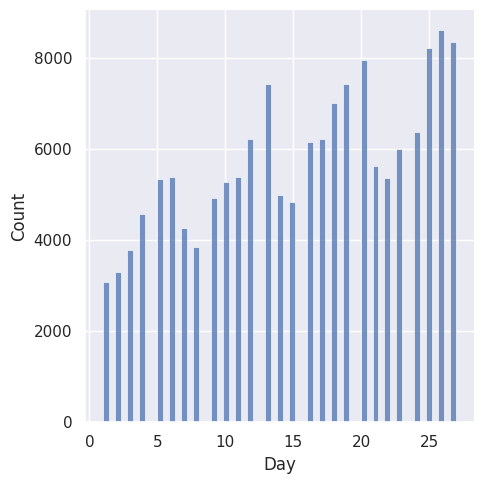

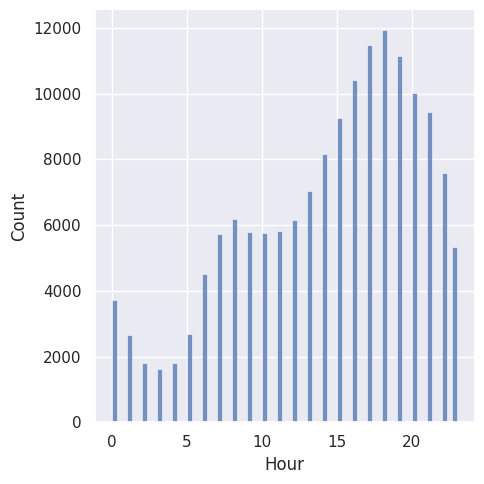

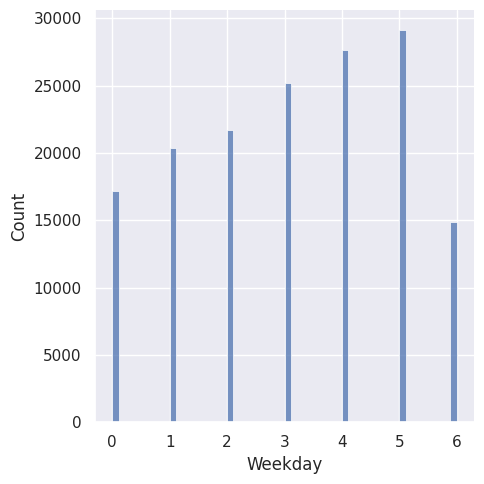

In [4]:
# Checking on which day of september the Uber trips were highest:
sns.set(rc = {'figure.figsize' : (12, 10)})
sns.displot(data['Day'])

# Analysing the fares based on hours:
sns.displot(data['Hour'])

# Analysing the fares based on weekdays:
sns.displot(data['Weekday'])

<Axes: xlabel='Hour', ylabel='Weekday'>

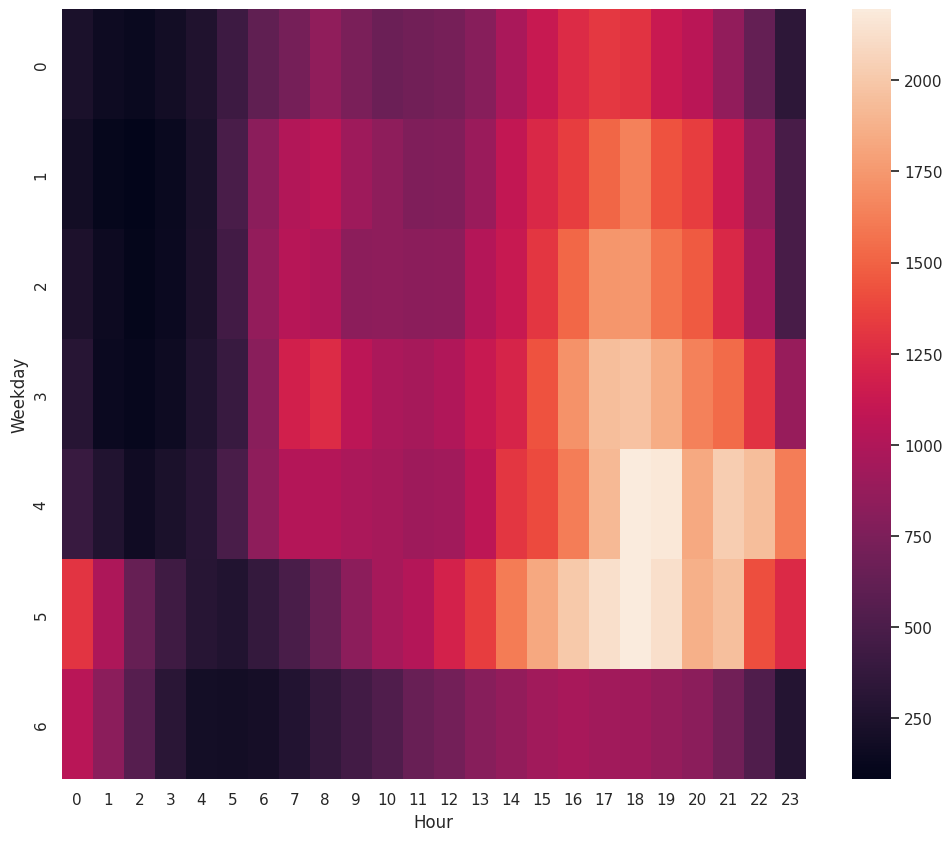

In [5]:
# Correlation of Weekday and Hour:
df = data.groupby(['Weekday', 'Hour']).apply(lambda x : len(x))
df = df.unstack()
sns.heatmap(df, annot = False)

/usr/local/lib/python3.10/dist-packages/pandas/plotting/_matplotlib/core.py:1259: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(


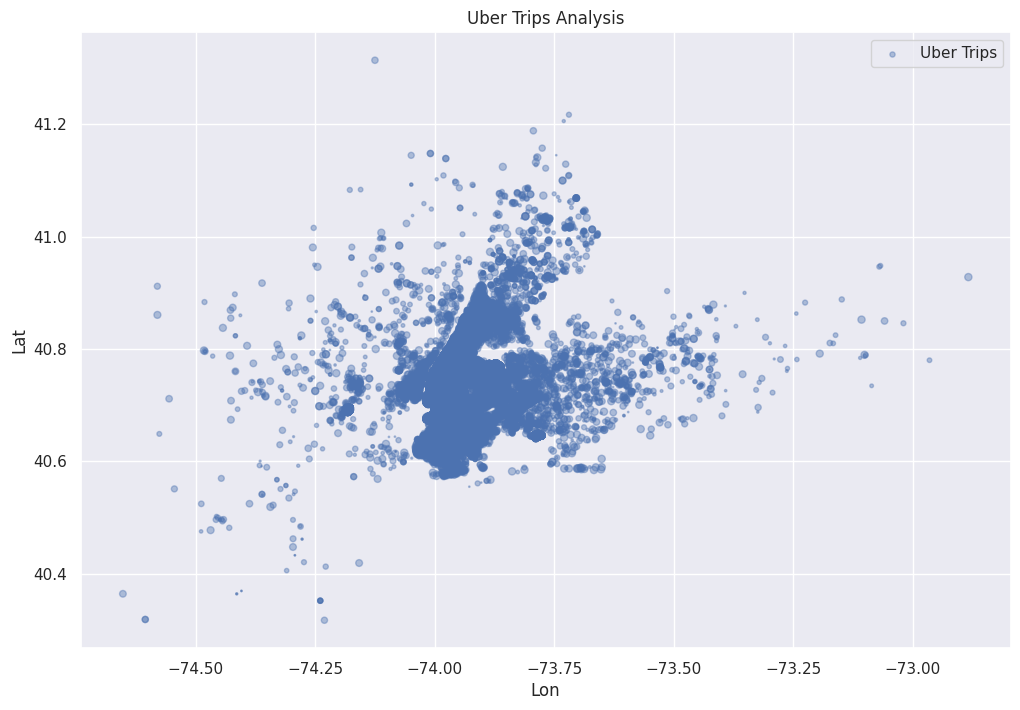

In [6]:
# Plotting the density of Uber trips according to the regions of the New Your city:
data.plot(kind = 'scatter', x = 'Lon', y = 'Lat', alpha = 0.4,
          s = data['Day'], label = 'Uber Trips',
          figsize = (12, 8), cmap = plt.get_cmap('jet'))
plt.title('Uber Trips Analysis')
plt.legend()
plt.show()